### EDA Project

I have selected the client Timothy Stevens who is a seller and who owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise.

To the following stake holder requirements I have formulated the following hypothesis.

**Hypothesis:**

1. Price adjustment to the expensive apartments can cause a sale within a period of one year.<br>
2. Renovating the current state of the apartments would lead to increase in profit margins.<br>
3. Homes in central zip codes have higher prices regardless of grade or condition.<br>

1. Handle the Imports

In [1]:
import pandas as pd
import numpy as np
from time import sleep
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import fsspec
from shapely.geometry import Point
pd.__version__

'2.3.3'

1.1 Get Data into dataframes

In [ ]:
df_prices = pd.read_csv('data\eda_price_data.csv', delimiter=',')
df_housing = pd.read_csv('data\eda_house_details.csv', delimiter=',')


1.2 Check the individual data

In [ ]:
price_data_list = [df_prices.head(10),df_prices.info()]

for i in price_data_list:
    print(i)


In [ ]:
housing_data_list = [df_housing.head(10),df_housing.info()]

for i in housing_data_list:
    print(i)

In [ ]:
# Finding clues within the data for better decision making

msno.bar(df_housing)
msno.matrix(df_housing)

In [ ]:
# Finding clues within the data for better decision making

msno.bar(df_prices)
msno.matrix(df_prices)

In [ ]:
df_prices.head(20)

In [ ]:
# Join the pandas table based upon the primary_key
df_housing.head(20)

In [ ]:
updated_prices = df_prices.sort_values(by =['house_id'])
updated_prices.reset_index(inplace=True)
# updated_prices.head()

In [ ]:
# Join the tables now
df_list = [df_housing, updated_prices]
# result = pd.concat(df_list, axis=1).reindex(df_housing.index)
# result = pd.concat(df_list, axis=1, join="inner")
# result
# updated_prices

# 1. Data Cleaning

-------

### 1.1 Data exploration and cleaning the data 
-------
* Filtering the columns for our Hypothesis
* Remove unneccessary data
* Drop duplicates if present in the dataset


In [ ]:
# Read the housing price data 
def re_read_df_housing_price():
    return  pd.read_csv('data\eda_house_price_details.csv', delimiter=',')

df_housing_prices_data = re_read_df_housing_price()

df_housing_prices_data.head(10)
df_housing_prices_data.tail(10)



In [ ]:
# Exploring within the data

#Check the dataset
df_housing_prices_data.head(10)

In [ ]:
# Test the value count are singular/duplicates for a column data via csv files
def check_dups_via_csv(df,df_column,name='default.csv'):
    df[df_column].value_counts().to_csv(name)
    print(f'Created {name}')

# Test
# check_dups_via_csv(df_housing_prices_data, 'id', 'id.csv')

In [ ]:
msno.bar(df_housing_prices_data,color='orange')
msno.matrix(df_housing_prices_data, sparkline=True, figsize=(10,5), fontsize=12, color=(0.5, 0.58, 0.2))

In [ ]:
#Check if the column naming has no spaces or any unncessary char
df_housing_prices_data.columns

In [ ]:
# Check for the duplicates within the dataset
df_housing_prices_data.duplicated().value_counts()

In [ ]:
# Check the datatypes
df_housing_prices_data.dtypes
df_housing_prices_data.info()

In [ ]:
# Change the date to datetime format %Y/%m/%d
print('Before:',df_housing_prices_data.date[100],'\n\t',type(df_housing_prices_data.date[100]) )
df_housing_prices_data['date'] = pd.to_datetime(df_housing_prices_data['date'], format='%Y-%m-%d')
print('After:',df_housing_prices_data.date[100],'\n\t',type(df_housing_prices_data.date[100]))

In [ ]:
# Seems issue with the year renovated column
# Should be int but is float

def ret_df_unique_values(df, df_col, text=''):
    unique_years = df[df_col].unique()
    print('\n',text,unique_years,'\n', type(unique_years),'\n',type(unique_years[0]),'\n',len(unique_years),'\n',df[df_col].shape )
    return unique_years

# df_housing_prices_data = re_read_df_housing_price()
print(df_housing_prices_data.yr_renovated.shape)
ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'Before:')

# First converting yr_renovated to string and removing the last appended entries
df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].astype(str).str[:-3] 

# Replacing the empty string with 0 and changing type to in
df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].replace('',0).astype(int)
ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'After3:')

#Checking if the len remains same , consistent with data
print(df_housing_prices_data.yr_renovated.shape)


In [ ]:
df_housing_prices_data.head(10)

In [ ]:
# Other thing to notice is the number of bedrooms and bathrooms are floats
# Converting to int

df_housing_prices_data.bedrooms = df_housing_prices_data.bedrooms.astype(int)

# df_housing_prices_data.loc[:,'bedrooms'] = df_housing_prices_data.loc[:,'waterfront'].astype(int)
ret_df_unique_values(df_housing_prices_data,'bedrooms')

# Rounding of and converting to int
# df_housing_prices_data['bathrooms'] = df_housing_prices_data['bathrooms'].round().astype(int)
df_housing_prices_data.loc[:,'bathrooms'] = df_housing_prices_data.loc[:,'bathrooms'].astype(int)

ret_df_unique_values(df_housing_prices_data,'bathrooms','bathrooms')
df_housing_prices_data


In [ ]:
# Confirm the waterfront houses and replace the nan with 0
print(df_housing_prices_data['waterfront'].value_counts(),
df_housing_prices_data.waterfront.shape,
df_housing_prices_data.waterfront.unique(),
)

df_housing_prices_data.loc[:,'waterfront'] = df_housing_prices_data.loc[:,'waterfront'].fillna(0).astype(int)

#df_housing_prices_data.waterfront = df_housing_prices_data['waterfront'].fillna(0).astype(int)
print(df_housing_prices_data['waterfront'].value_counts(),
df_housing_prices_data.waterfront.shape,
df_housing_prices_data.waterfront.unique(),
)



In [ ]:
# Issue with the type of the floors column
# df_housing_prices_data = re_read_df_housing_price()

ret_df_unique_values(df_housing_prices_data,'floors','Before')
# # df_housing_prices_data['floors'] = round(df_housing_prices_data['floors'])
# # df_housing_prices_data.loc[:,'floors'] = round(df_housing_prices_data.loc[:,'floors']).astype('Int64')
# df_housing_prices_data.loc[:, 'floors'] = np.round(df_housing_prices_data['floors'])#.astype('int64')  #np.floor(df_housing_prices_data['floors']).fillna(0).astype(int)
# df_housing_prices_data.loc[:, 'floors'] = df_housing_prices_data.loc[:, 'floors'].astype(int)

df_housing_prices_data['floors'] = df_housing_prices_data['floors'].astype(int)
ret_df_unique_values(df_housing_prices_data,'floors','After')

df_housing_prices_data #.floors.astype(int)

In [ ]:
# Data type of view column from float to int and replace all nan to 0
ret_df_unique_values(df_housing_prices_data,'view','Before')
# df_housing_prices_data['view'] = df_housing_prices_data['view'].fillna(0).astype(int)
df_housing_prices_data.loc[:,'view'] = df_housing_prices_data.loc[:,'view'].fillna(0).astype(int)
ret_df_unique_values(df_housing_prices_data,'view','After')


In [ ]:
#No issue with grade and condition
ret_df_unique_values(df_housing_prices_data,'grade','Before')
ret_df_unique_values(df_housing_prices_data,'condition','Before')


In [ ]:
# Removing all the houses with duplicate id's
# df_housing_prices_data = re_read_df_housing_price()
df_housing_prices_data[df_housing_prices_data.id.duplicated()]

ret_df_unique_values(df_housing_prices_data,'id','Before')
# check_dups_via_csv(df_housing_prices_data,'id')

df_housing_prices_data = df_housing_prices_data.drop_duplicates(subset=['id'], keep='first')
ret_df_unique_values(df_housing_prices_data,'id','After')
# check_dups_via_csv(df_housing_prices_data,'id')

In [ ]:
# Determine for these values
# df_housing_prices_data = re_read_df_housing_price()
ret_df_unique_values(df_housing_prices_data,'price','Before')
# check_dups_via_csv(df_housing_prices_data,'price')

df_housing_prices_data['price'] = df_housing_prices_data['price'].round().astype(int)
ret_df_unique_values(df_housing_prices_data,'price','After')
# check_dups_via_csv(df_housing_prices_data,'price')

In [ ]:
# Uniqueness of the house can be determined by the 'id','yr_built','zipcode','lat','long'
# df_housing_prices_data = re_read_df_housing_price()
df_geolocation_filter = pd.DataFrame(zip(df_housing_prices_data['id'],df_housing_prices_data['yr_built'],df_housing_prices_data['zipcode'],df_housing_prices_data['lat'],df_housing_prices_data['long']), columns=['id','yr_built','zipcode','lat','long'])

# check_dups_via_csv(df_geolocation_filter,['id','yr_built','zipcode','lat','long'], 'geo.csv')

# If duplicated are found then a common function to drop 
def drop_dups_from_dataset(df,df_column,*args):
    df = df.drop_duplicates(subset=[df_column], keep='first')
    return df

'''
# test dups
df_housing_prices_data_filtered = drop_dups_from_dataset(df_housing_prices_data,'id','yr_built','zipcode','lat','long')
df_housing_prices_data_filtered.head(15)
# recheck via csv 
check_dups_via_csv(df_housing_prices_data_filtered,['id','yr_built','zipcode','lat','long'], 'geo.csv')

df_housing_prices_data_filtered.duplicated().value_counts()
'''

In [ ]:
'''
# Split into two functions
def determine_nan_n_replace_zero(df,df_column, replace= False):
    dummy_df = df.copy()
    if replace:
        dummy_df.loc[:, df_column] = dummy_df[df_column].fillna(0)
    return dummy_df[df_column] 

def convert_to_int(df,df_column, ch_dtypes=None):
    dummy_df = df.copy()
    if ch_dtypes is not None:
        dummy_df.loc[:, df_column] = pd.to_numeric(dummy_df[df_column], errors='coerce')
        if ch_dtypes == int:
                dummy_df.loc[:, df_column] = dummy_df[df_column].astype('Int64')
        else:
            dummy_df.loc[:, df_column] = dummy_df[df_column].astype(ch_dtypes)
    return dummy_df[df_column]

df_housing_prices_data.loc[: ,'sqft_basement'] = determine_nan_n_replace_zero(df_housing_prices_data,'sqft_basement',True)
df_housing_prices_data.loc[: ,'sqft_basement'] = convert_to_int(df_housing_prices_data,'sqft_basement',int)
df_housing_prices_data['sqft_basement']
'''

df_housing_prices_data.sqft_basement = df_housing_prices_data.sqft_basement.fillna(0) 
df_housing_prices_data.sqft_basement = round(df_housing_prices_data['sqft_basement']).astype(int)
df_housing_prices_data.sqft_basement


In [ ]:
# def determine_nan_n_replace_zero(df, df_column,ch_dtypes= None,replace = False ):
#     dummy_df = df.copy()
#     # print(df[df_column].isna().value_counts())
#     if replace == True:
#         dummy_df.loc[:,(df_column)] = dummy_df.loc[:,(df_column)].fillna(0)
#         # print('\n',type(df_column),df[df_column].isna().value_counts())  
#         if ch_dtypes != None:
#             dummy_df.loc[:,(df_column)] = round(dummy_df.loc[:,(df_column)]).astype(ch_dtypes)
#             dummy_df.loc[:,(df_column)] = dummy_df.loc[:,(df_column)].astype(ch_dtypes)
#             print(dummy_df.loc[:,(df_column)]) #, dummy_df.loc[:,(df_column)].astype(int)
#             return dummy_df[df_column]
#         return dummy_df[df_column] 

# def determine_nan_n_replace_zero_y(df, df_column, ch_dtypes=None, replace=False):
#     dummy_df = df.copy()
#     if replace:
#         # print(dummy_df.df_column)
#         # dummy_df.df_column = dummy_df.df_column.fillna(0)
#         dummy_df.loc[:, df_column] = dummy_df[df_column].fillna(0)
#     if ch_dtypes is not None:

#         # dummy_df.loc[:, df_column] = pd.to_numeric(dummy_df[df_column], errors='coerce')
#         if ch_dtypes == int:
#                 dummy_df.df_column = dummy_df.df_column.astype('Int64')
#         else:
#             dummy_df.df_column = dummy_df.df_column.astype(ch_dtypes)
#     return dummy_df.df_column


# test 
# df_housing_prices_data = re_read_df_housing_price()
# df_housing_prices_data.sqft_basement = determine_nan_n_replace_zero_y(df_housing_prices_data,'sqft_basement',int, True)
# df_housing_prices_data.sqft_basement

# df_housing_prices_data.loc[:,'sqft_basement'].astype(int)






In [ ]:
# Change all the float items to int and return the df

def dfcoln_int_operation(df,df_coln,ch_type):
    new = df.copy()
    for i in df_coln:
        new[i] = new[i].fillna(0).astype(ch_type)
    return new

new = dfcoln_int_operation(df_housing_prices_data, ['bedrooms','bathrooms','view','sqft_living15','sqft_living','sqft_lot','sqft_lot15','waterfront','price'], int)
# df_housing_prices_data.head()
# new
df_housing_prices_data.head()

In [ ]:
# check_dups_via_csv(df_housing_prices_data,'sqft_living','sqft_living.csv')
# check_dups_via_csv(df_housing_prices_data,'sqft_lot','sqft_lot.csv')

# I checked the values of the sqft_x columns and they looked like those don't have any decimals values
# redundant so may be turning to int to speed it up a bit

df_housing_prices_data.sqft_lot = round(df_housing_prices_data['sqft_lot']).astype(int)
df_housing_prices_data.sqft_lot15 = round(df_housing_prices_data['sqft_lot15']).astype(int)
df_housing_prices_data.sqft_living = round(df_housing_prices_data['sqft_living']).astype(int)
df_housing_prices_data.sqft_living15 = round(df_housing_prices_data['sqft_living15']).astype(int)



In [ ]:
# After cleaning all the data finally the data set would be

df_final_set = df_housing_prices_data.copy()
df_final_set

In [ ]:
from eda_data_cleaning import DataCleaning

dc = DataCleaning("data\eda_house_price_details.csv")
print(dc, type(dc))

df = dc.cleaned_data_and_transformation()
print(df, type(df))

## Hypothesis

-----

#### Hypothesis 3

Homes in central zip codes have higher prices regardless of grade or condition.
Need to check certain columns within the data.

My Take: 
I need from the data frame columns :

    id    
    zipcode
    lat
    long
    price 
    grade
    condition
    sqft_living
    sqft_lot

In [5]:
from eda_data_cleaning import DataCleaning
from eda_hypothesis import Hypothesis3 , Hypothesis

ob_hy3 = Hypothesis3()
# ob_hy3.vis_all_columns()
df_h3 = ob_hy3.selective_df.copy()


<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   zipcode        21420 non-null  int64  
 2   lat            21420 non-null  float64
 3   long           21420 non-null  float64
 4   price          21420 non-null  int64  
 5   grade          21420 non-null  int64  
 6   condition      21420 non-null  int64  
 7   sqft_living    21420 non-null  int64  
 8   sqft_lot       21420 non-null  int64  
 9   sqft_living15  21420 non-null  int64  
 10  sqft_lot15     21420 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.0 MB


<Axes: xlabel='zipcode', ylabel='grade'>

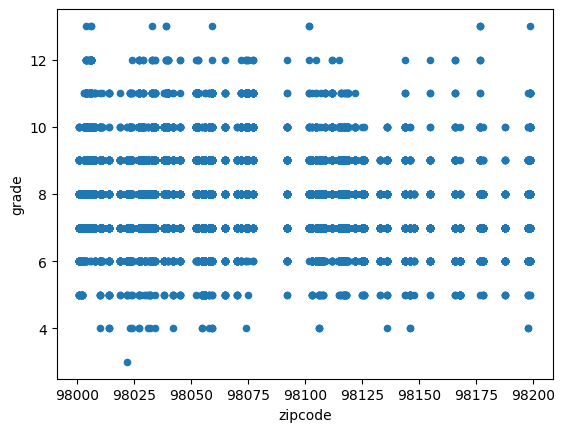

In [6]:
# Got the data for the hypothesis - 3
df_h3.head()
df_h3.info()
df_h3.plot(kind='scatter',x='zipcode',y='grade')




<Axes: xlabel='zipcode', ylabel='price'>

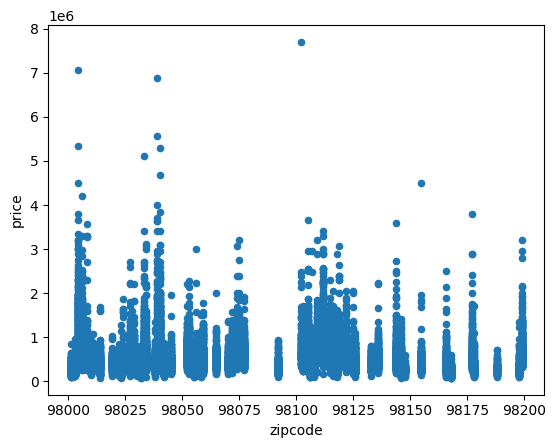

In [10]:
df_h3.plot(kind = 'scatter', x= 'zipcode', y='price')

In [20]:
df_h3['zipcode'].describe()

# df_h3['price_per_sqft']= df_h3[df_h3['price'] / df_h3['sqft_living']]

df_h3.eval('price_per_sqft = price / sqft_living', inplace=True)
df_h3.head()

,id,zipcode,lat,long,price,grade,condition,sqft_living,sqft_lot,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,98178,47.5112,-122.257,221900,7,3,1180,5650,1340,5650,188.050847
1,6414100192,98125,47.7210,-122.319,538000,7,3,2570,7242,1690,7639,209.338521
2,5631500400,98028,47.7379,-122.233,180000,6,3,770,10000,2720,8062,233.766234
3,2487200875,98136,47.5208,-122.393,604000,7,5,1960,5000,1360,5000,308.163265
4,1954400510,98074,47.6168,-122.045,510000,8,3,1680,8080,1800,7503,303.571429


array([188.05084746, 209.3385214 , 233.76623377, ..., 173.16017316,
       394.21666667, 318.62745098], shape=(16379,))

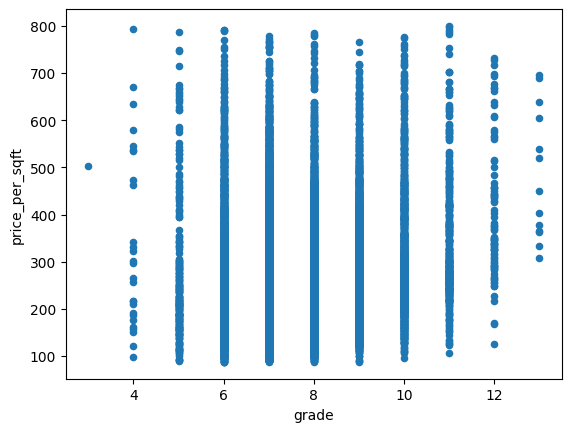

In [28]:
df_h3.plot(kind='scatter', x='grade', y='price_per_sqft')
# df_h3.plot(kind='scatter', x='grade', y='price', xrot= 45, yrot =100)
df_h3['price_per_sqft'].unique()